In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [83]:
HV_1 = np.array([11, 13.5, 16, 18.5, 21, 23.5, 26, 28.5, 31, 33.5])

HV_3 = np.array([1.031664801,6.606919839,14.77416486,24.87343975,36.58739622,49.71795068,64.12604133,79.70703378,96.37847681,114.0732127])

intensidad_3 = np.array([134,517.386,1022,1628,2209,2808,3477.03, 4189.5,4819,5680.05])

intensidad_2 = np.array([34.35,128,249,393,570,715.2593,894.69,1073.71,1247.44,1445.97])

intensidad_1 = np.array([134, 517.386, 1022, 1628, 2209, 2808, 3477.03, 4189.5, 4819, 5680.05])

HV = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
intensidad = np.array([737.77,1446.57,2097.4,2753.29,3293.08,3720.25,4269.17,4824.3,5568.1,6142.44
])

error_intensidad = [81,98,158,253,360,432,510,638,687,759]

def lineal(x, m,b):
    return m*x + b


parametros, cov = curve_fit(lineal, HV, intensidad)
error_parametros = np.sqrt(np.diag(cov))


print(parametros)
print(error_parametros)

Residuales2=[]
for i in range(len(HV)):
    Y_pred = lineal(HV[i], parametros[0], parametros[1])
    r = intensidad[i] - Y_pred
    Residuales2.append(r)
    

    

[5824.36667458  281.83532788]
[109.22546794  67.77261805]


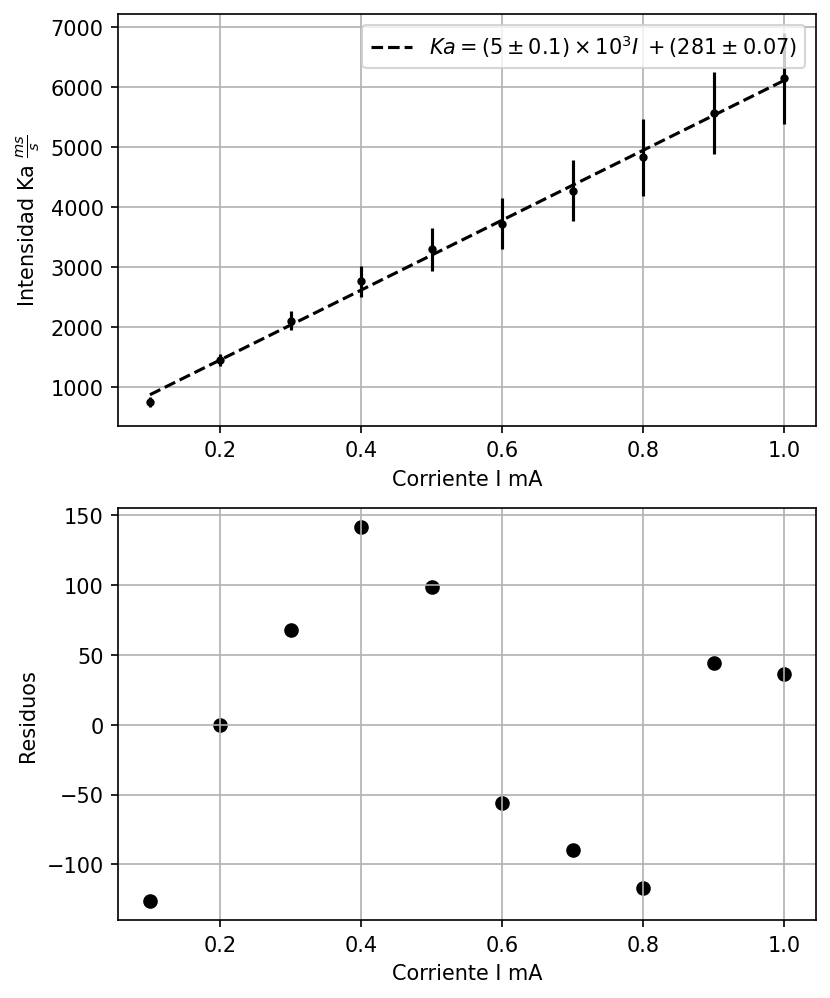

In [86]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), dpi=150)

ax1.grid()
ax1.set_xlabel('Corriente I '+ 'mA')
ax1.set_ylabel('Intensidad Ka ' + r'$\frac{ms}{s}$')

lab = r'$Ka = (5  \pm 0.1) \times 10^{3} I \;+ (281 \pm 0.07)$'
ax1.errorbar(HV, intensidad, error_intensidad, c="black", linestyle=" ")
ax1.plot(HV, lineal(HV, parametros[0], parametros[1]), c="black", linestyle= "--", label= lab)
ax1.scatter(HV, intensidad, c="black", marker=".")
ax1.legend()

ax2.grid()
ax2.scatter(HV, Residuales2, c = "black")
ax2.set_ylabel('Residuos')
ax2.set_xlabel('Corriente I '+ 'mA')

plt.savefig("graficacorrienteKa.png")
